In [11]:
import utilities as util
import preprocessor as prep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import MousePosition
import folium

In [51]:
t = pd.read_csv('C:/Users/Ben/Documents/GitHub/Animal-Motion-for-predictions/data/animals/tiger_sharks_full_more_detailed_with_dependantVar.csv')

t['Barometric Pressure'] = t['Barometric Pressure'].replace('-', float('nan'))
t['Wind Speed (kn)'] = t['Wind Speed (kn)'].replace('-', float('nan'))
t['Air Temp (°F)'] = t['Air Temp (°F)'].replace('-', float('nan'))
t['Wind Gust (kn)'] = t['Wind Gust (kn)'].replace('-', float('nan'))
t['Humidity (%)'] = t['Humidity (%)'].replace('-', float('nan'))


t['Barometric Pressure'] = t['Barometric Pressure'].astype(float)
t['Wind Speed (kn)'] = t['Wind Speed (kn)'].astype(float)
t['Air Temp (°F)'] = t['Air Temp (°F)'].astype(float)
t['Wind Gust (kn)'] = t['Wind Gust (kn)'].astype(float)
t['Humidity (%)'] = t['Humidity (%)'].astype(float)


In [56]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming your DataFrame is named "df"
# selected_columns = ['longitude', 'latitude', 'year', 'depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# Accuracy: 0.713764
# Precision: 0.593156
# Recall: 0.549296
# F1-Score: 0.570384


# selected_columns = ['depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.738124
# 1  Precision  0.640816
# 2     Recall  0.552817
# 3   F1-Score  0.593573


# selected_columns = ['depth',
#                     'Barometric Pressure', 'Wind Speed (kn)', 'severe weather event']
# 0   Accuracy  0.660171
# 1  Precision  0.857143
# 2     Recall  0.021127
# 3   F1-Score  0.041237

# selected_columns = ['depth',
#                     'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.736906
# 1  Precision  0.644068
# 2     Recall  0.535211
# 3   F1-Score  0.584615

# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)','Barometric Pressure',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.739342
# 1  Precision  0.642276
# 2     Recall  0.556338
# 3   F1-Score  0.596226

# selected_columns = ['Wind Speed (kn)', 'Air Temp (°F)','depth',
#                     'Dist from Feeding Spot (km)', 'severe weather event']
# 0   Accuracy  0.739342
# 1  Precision  0.642276
# 2     Recall  0.556338
# 3   F1-Score  0.596226

# selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
#                     'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 'Humidity (%)',
#                     'severe weather event' ]
# 0   Accuracy  0.716895             0.034448
# 1  Precision  0.611940             0.037262
# 2     Recall  0.532468             0.038152
# 3   F1-Score  0.569444             0.037862



selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                    'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 
                    'severe weather event' ]
# Evaluation Report:
#       Metric     Score  Confidence Interval
# 0   Accuracy  0.714982             0.030879
# 1  Precision  0.644269             0.032747
# 2     Recall  0.530945             0.034136
# 3   F1-Score  0.582143             0.033737

# Select the columns of interest from the DataFrame
selected_df = t[selected_columns]
print('size before cleanup: ', selected_df.shape)
selected_df = selected_df.replace('-', np.nan)
selected_df.dropna(subset = selected_columns, inplace=True)
print('size after cleanup: ', selected_df.shape)

# Split the data into independent variables (X) and the dependent variable (y)
X = selected_df.iloc[:, :-1]
y = selected_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


size before cleanup:  (5772, 7)
size after cleanup:  (4103, 7)


In [ ]:
util.get_LR_report(t)

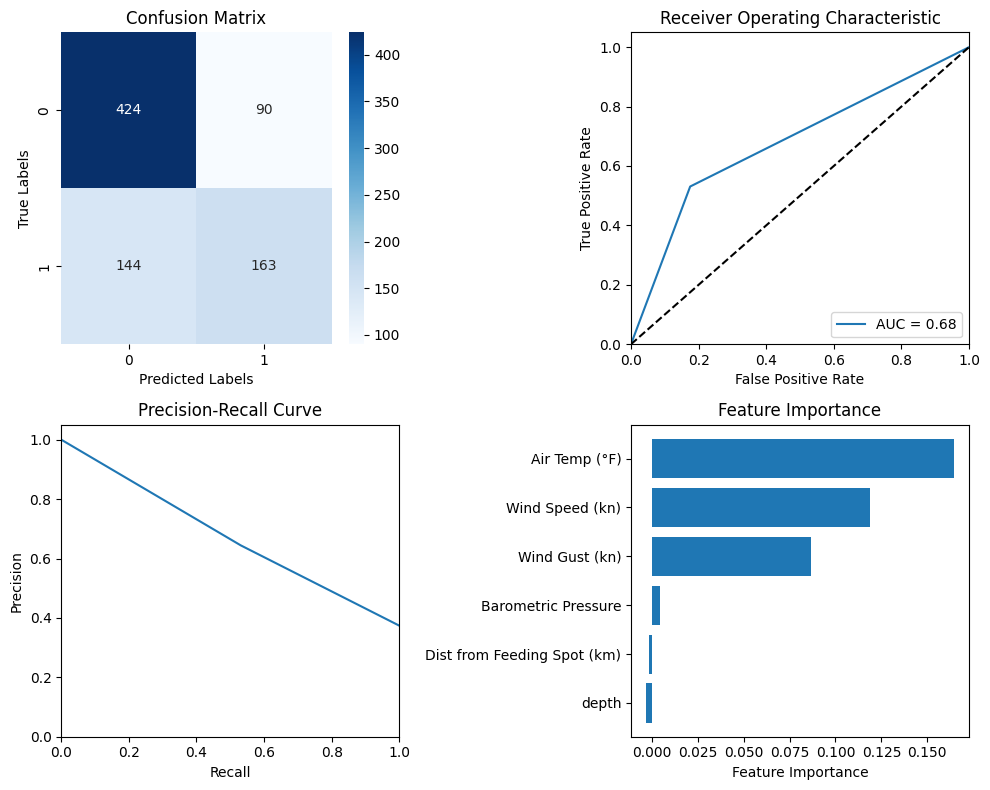

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.inspection import permutation_importance

# Assuming you have already trained the model and made predictions on the test data

# Create a figure with two rows and two columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix")
axs[0, 0].set_xlabel("Predicted Labels")
axs[0, 0].set_ylabel("True Labels")

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
axs[0, 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axs[0, 1].plot([0, 1], [0, 1], "k--")
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel("False Positive Rate")
axs[0, 1].set_ylabel("True Positive Rate")
axs[0, 1].set_title("Receiver Operating Characteristic")
axs[0, 1].legend(loc="lower right")

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
axs[1, 0].plot(recall, precision)
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel("Recall")
axs[1, 0].set_ylabel("Precision")
axs[1, 0].set_title("Precision-Recall Curve")

# Compute and plot feature importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

axs[1, 1].barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
axs[1, 1].set_xlabel("Feature Importance")
axs[1, 1].set_title("Feature Importance")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


size before cleanup:  (5772, 8)
size after cleanup:  (3283, 8)


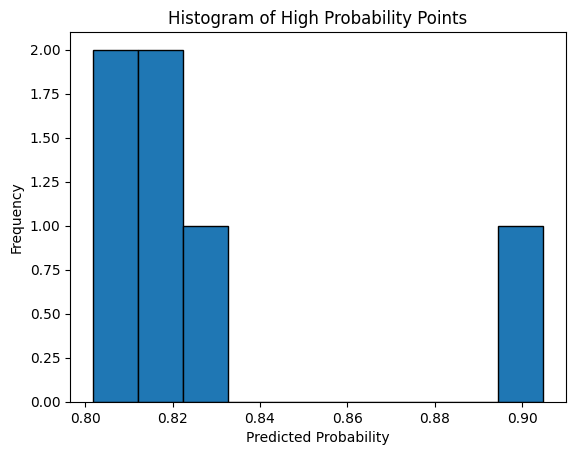

In [54]:





















import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming your DataFrame is named "df"
selected_columns = ['depth','Barometric Pressure', 'Wind Speed (kn)', 'Air Temp (°F)',
                    'Dist from Feeding Spot (km)', 'Wind Gust (kn)', 'Humidity (%)',
                    'severe weather event']

# Select the columns of interest from the DataFrame
selected_df = t[selected_columns]
print('size before cleanup: ', selected_df.shape)
selected_df = selected_df.replace('-', np.nan)
selected_df.dropna(inplace=True)
print('size after cleanup: ', selected_df.shape)

# Split the data into independent variables (X) and the dependent variable (y)
X = selected_df.iloc[:, :-1]
y = selected_df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = model.predict_proba(X_test)

# The predicted probabilities will be a 2D array with shape (n_samples, n_classes)
# Assuming you have two classes (0 and 1), you can extract the probabilities for class 1
y_pred_prob_class1 = y_pred_proba[:, 1]
# plt.hist(y_pred_prob_class1, bins=10, edgecolor='black')
# plt.xlabel('Predicted Probability')
# plt.ylabel('Frequency')
# plt.title('Histogram of Predicted Probabilities')
# plt.show()


# plt.scatter(X_test['Barometric Pressure'], y_pred_prob_class1)
# plt.xlabel('Baro Pressure')
# plt.ylabel('Predicted Probability')
# plt.title('Predicted Probability vs Depth')
# plt.show()

# Filter the predicted probabilities for the positive class (event occurring)
y_pred_prob_class1 = y_pred_proba[:, 1]

# Set the threshold for high probability
threshold = 0.8

# Filter the high probability points
high_prob_points = y_pred_prob_class1[y_pred_prob_class1 >= threshold]

# Plot the histogram of high probability points
plt.hist(high_prob_points, bins=10, edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of High Probability Points')
plt.show()

